In [ ]:
#Data.csv

**Step 1: Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Importing dataset**

In [4]:
df=pd.read_csv('Data.csv')

In [5]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [6]:
df.shape

(10, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [8]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [9]:
k=df['Age'].median()
df['Age'].fillna(value = k, inplace = True)
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 3: Handling the missing data**

In [10]:
df['Salary'].mean()

63777.77777777778

In [11]:
df['Salary'].fillna(value = 63780, inplace = True)

In [12]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63780.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 4: Encoding categorical data**

In [13]:
df['Purchased']=df['Purchased'].map({'Yes':1,'No':0})

In [14]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,63780.0,1
5,France,35.0,58000.0,1
6,Spain,38.0,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,France,37.0,67000.0,1


**Step 5: Creating a dummy variable**

In [16]:
dt=pd.get_dummies(df.Country)
dt

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [18]:
df1=pd.concat([df,dt],axis='columns')
df1

,Country,Age,Salary,Purchased,France,Germany,Spain
0,France,44.0,72000.0,0,1,0,0
1,Spain,27.0,48000.0,1,0,0,1
2,Germany,30.0,54000.0,0,0,1,0
3,Spain,38.0,61000.0,0,0,0,1
4,Germany,40.0,63780.0,1,0,1,0
5,France,35.0,58000.0,1,1,0,0
6,Spain,38.0,52000.0,0,0,0,1
7,France,48.0,79000.0,1,1,0,0
8,Germany,50.0,83000.0,0,0,1,0
9,France,37.0,67000.0,1,1,0,0


In [19]:
new_df=df1.drop(['Country','Spain'],axis='columns')

In [20]:
new_df

,Age,Salary,Purchased,France,Germany
0,44.0,72000.0,0,1,0
1,27.0,48000.0,1,0,0
2,30.0,54000.0,0,0,1
3,38.0,61000.0,0,0,0
4,40.0,63780.0,1,0,1
5,35.0,58000.0,1,1,0
6,38.0,52000.0,0,0,0
7,48.0,79000.0,1,1,0
8,50.0,83000.0,0,0,1
9,37.0,67000.0,1,1,0


In [21]:
import pandas as pd 
from sklearn.model_selection import train_test_split 

from sklearn import metrics 
import seaborn as sn 
import matplotlib.pyplot as plt 

**Step 6: Splitting the datasets into training sets and Test sets**

In [22]:
X = new_df[['Age', 'Salary','France','Germany']].values 
y = new_df['Purchased'].values 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25) 

In [23]:
X_train

array([[2.7e+01, 4.8e+04, 0.0e+00, 0.0e+00],
       [3.5e+01, 5.8e+04, 1.0e+00, 0.0e+00],
       [4.8e+01, 7.9e+04, 1.0e+00, 0.0e+00],
       [4.4e+01, 7.2e+04, 1.0e+00, 0.0e+00],
       [3.8e+01, 5.2e+04, 0.0e+00, 0.0e+00],
       [3.0e+01, 5.4e+04, 0.0e+00, 1.0e+00],
       [5.0e+01, 8.3e+04, 0.0e+00, 1.0e+00]])

In [24]:
y_train

array([1, 1, 1, 0, 0, 0, 0])

**Step 7: Feature Scaling**

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [26]:
X_train

array([[-1.44880122, -1.20755236, -0.8660254 , -0.63245553],
       [-0.47129678, -0.43910995,  1.15470054, -0.63245553],
       [ 1.11714793,  1.17461911,  1.15470054, -0.63245553],
       [ 0.62839571,  0.63670942,  1.15470054, -0.63245553],
       [-0.10473262, -0.90017539, -0.8660254 , -0.63245553],
       [-1.08223706, -0.74648691, -0.8660254 ,  1.58113883],
       [ 1.36152404,  1.48199607, -0.8660254 ,  1.58113883]])

In [27]:
from sklearn.linear_model import LogisticRegression 
logistic_regression= LogisticRegression() 
logistic_regression.fit(X_train,y_train) 
y_pred=logistic_regression.predict(X_test)

In [28]:
logistic_regression.predict_proba(X_test)

array([[0.34525724, 0.65474276],
       [0.59888105, 0.40111895],
       [0.87025303, 0.12974697]])

In [29]:
logistic_regression.coef_

array([[-0.43104759, -0.04366308,  0.49893967, -0.62691139]])

In [30]:
logistic_regression.intercept_

array([-0.41945601])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


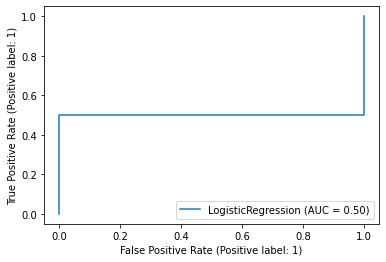

In [32]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logistic_regression, X_test, y_test)